# Exploratory data analysis of Amazon Top 50 Books

### Objective 
1. Visualize the correlation matrix using heatmap
2. 

#### The data on air pollution in Seoul were analyzed and were visualized in a map using geopandas. The dataset was provided by Kaggle.


In [22]:
#data preprocessing, analysis
import pandas as pd
import numpy as np

#visualization for graph
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
amazon = pd.read_csv('/Users/minjeongkim/Desktop/datasets/bestsellers with categories.csv')

In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [28]:
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [27]:
# Check if there is any empty/null value in the dataframe 
print(amazon.isnull().sum().sum()) 

0


In [34]:
amazon['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [33]:
amazon['User Rating'].value_counts(normalize=True)

4.8    0.230909
4.7    0.196364
4.6    0.190909
4.5    0.109091
4.9    0.094545
4.4    0.069091
4.3    0.045455
4.0    0.025455
4.2    0.014545
4.1    0.010909
3.9    0.005455
3.8    0.003636
3.3    0.001818
3.6    0.001818
Name: User Rating, dtype: float64

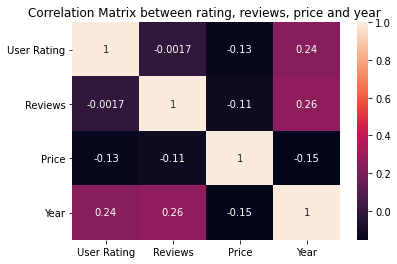

In [31]:
# Check the correlation between rating, reviews, price and year 
corrmat = amazon.corr()
sns.heatmap(corrmat, annot=True)
plt.title('Correlation Matrix between rating, reviews, price and year')
plt.show()